In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Confirm Pycaret version is 2.1
from pycaret.utils import version
print('Confirm Pycaret version is 2.1.X?')
print('Pycaret Version: ', version())


Confirm Pycaret version is 2.1.X?
Pycaret Version:  3.0.4


In [2]:
def idade_media(df_train: pd.DataFrame, df_test: pd.DataFrame):
    _df_test = pd.DataFrame.copy(df_test)
    _df_train = pd.DataFrame.copy(df_train)

    _df_test['Survived'] = 0

    df = pd.concat([_df_train, _df_test], ignore_index=True)
    df.dropna(subset=['Age'], how='all', inplace=True)
    return df.groupby('Saudacao')['Age'].mean()

def set_idade_media_if_null(row: pd.Series, media):
    result = row['Age']
    if ( np.isnan(row['Age']) ):
        result = media[row['Saudacao']]
    return result

def tipoIdade(x):
    if x < 18:
        return 'Crianca'
    elif x >= 18 and x < 50:
        return 'Adulto'
    else:
        return 'Idoso'

In [3]:
# Load the data
split_train = False
if split_train:
  df = pd.read_csv("train.csv")
  train, test = train_test_split(df, test_size=0.3, random_state=100)
else:
  train = pd.read_csv("train.csv")
  test = pd.read_csv("test.csv")

_train = pd.read_csv("train.csv")
_test = pd.read_csv("test.csv")

In [4]:
train['Cabin'] = train['Cabin'].str[0:1]
train['Cabin'].fillna('C', inplace=True)
test['Cabin'] = test['Cabin'].str[0:1]
test['Cabin'].fillna('C', inplace=True)

train['Tam_Familia'] = train['SibSp'] + train['Parch']
test['Tam_Familia'] = test['SibSp'] + test['Parch']

train['Saudacao'] = train['Name'].str.extract("([A-Za-z]+)\.")
test['Saudacao'] = test['Name'].str.extract("([A-Za-z]+)\.")

_idade_media = idade_media(train, test)
train['Age'] = train.apply(set_idade_media_if_null, axis=1, media=_idade_media)
test['Age'] = test.apply(set_idade_media_if_null, axis=1, media=_idade_media)

# Reduzindo possibilidades para padronizar modelo, pois em teste não há todos os tipos existentes e treino
train['Saudacao']\
  .replace(['Mlle','Mme', 'Ms',  'Dr','Major','Lady','Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don'],
           ['Miss','Miss','Miss','Mr','Mr',   'Mrs', 'Mrs',     'Other',   'Other','Other','Mr',  'Mr', 'Mr'], inplace=True)
test['Saudacao']\
  .replace(['Dona','Mlle','Mme', 'Ms',  'Dr','Major','Lady','Countess','Jonkheer','Col',  'Rev',  'Capt','Sir','Don'],
           ['Miss','Miss','Miss','Miss','Mr','Mr',   'Mrs', 'Mrs',     'Other',   'Other','Other','Mr',  'Mr',  'Mr'], inplace=True)

# Classificando idade por Criança, Adulto, Idoso
train['t_idade'] = train['Age'].apply(lambda x: tipoIdade(x))
test['t_idade'] = test['Age'].apply(lambda x: tipoIdade(x))

In [5]:
# Preprocess the data
le = LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'].astype(str))
train['t_idade'] = le.fit_transform(train['t_idade'].astype(str))
train['Saudacao'] = le.fit_transform(train['Saudacao'].astype(str))
train['Embarked'] = le.fit_transform(train['Embarked'].astype(str))
train['Cabin'] = le.fit_transform(train['Cabin'].astype(str))

test['Sex'] = le.fit_transform(test['Sex'].astype(str))
test['t_idade'] = le.fit_transform(test['t_idade'].astype(str))
test['Saudacao'] = le.fit_transform(test['Saudacao'].astype(str))
test['Embarked'] = le.fit_transform(test['Embarked'].astype(str))
test['Cabin'] = le.fit_transform(test['Cabin'].astype(str))
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tam_Familia,Saudacao,t_idade
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.8292,2,1,0,2,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.0000,2,2,1,3,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.6875,2,1,0,2,2
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.6625,2,2,0,2,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.2875,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,32.252151,0,0,A.5. 3236,8.0500,2,2,0,2,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.9000,2,0,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,2,2,0,2,0
416,1308,3,"Ware, Mr. Frederick",1,32.252151,0,0,359309,8.0500,2,2,0,2,0


In [6]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tam_Familia,Saudacao,t_idade
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,2,2,1,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0,1,3,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,2,2,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,2,1,3,0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,2,2,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,2,2,0,4,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,2,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,21.774238,1,2,W./C. 6607,23.4500,2,2,3,1,0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0,0,2,0


In [7]:
# Fit the model
features = ['Sex', 't_idade', 'Tam_Familia', 'Cabin']

setup(data=train[['Survived'] + features], target='Survived', session_id=123, categorical_features=features)

,Description,Value
0,Session id,123
1,Target,Survived
2,Target type,Binary
3,Original data shape,"(891, 5)"
4,Transformed data shape,"(891, 21)"
5,Transformed train set shape,"(623, 21)"
6,Transformed test set shape,"(268, 21)"
7,Ordinal features,1
8,Categorical features,4
9,Preprocess,True


In [8]:
top3 = compare_models(n_select=3)
print(top3)
models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8169,0.8314,0.7525,0.7668,0.7576,0.6106,0.6125,0.0500
xgboost,Extreme Gradient Boosting,0.8153,0.8330,0.7525,0.7631,0.7556,0.6072,0.6093,0.0490
knn,K Neighbors Classifier,0.8121,0.8188,0.7574,0.7529,0.7543,0.6023,0.6032,0.1140
rf,Random Forest Classifier,0.8089,0.8324,0.7442,0.7554,0.7476,0.5939,0.5959,0.0680
ridge,Ridge Classifier,0.8088,0.0000,0.7069,0.7748,0.7373,0.5879,0.5911,0.0400
catboost,CatBoost Classifier,0.8088,0.8418,0.7359,0.7591,0.7454,0.5925,0.5944,0.3390
dt,Decision Tree Classifier,0.8072,0.8106,0.7317,0.7578,0.7426,0.5887,0.5906,0.0420
lda,Linear Discriminant Analysis,0.8072,0.8441,0.7069,0.7720,0.7360,0.5851,0.5880,0.0430
et,Extra Trees Classifier,0.8056,0.8110,0.7359,0.7526,0.7421,0.5863,0.5883,0.0650
ada,Ada Boost Classifier,0.8041,0.8394,0.7408,0.7461,0.7423,0.5845,0.5856,0.0490


Processing:   0%|          | 0/71 [00:00<?, ?it/s]

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False), XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_co

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
gbc = create_model('gbc', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8381,0.7500,0.7826,0.7660,0.6268,0.6272
1,0.8095,0.7676,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8889,0.9044,0.8750,0.8400,0.8571,0.7663,0.7667
3,0.8065,0.8952,0.6087,0.8235,0.7000,0.5618,0.5758
4,0.7742,0.8125,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.7581,0.7516,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8871,0.8805,0.8750,0.8400,0.8571,0.7639,0.7643
7,0.7742,0.7275,0.7083,0.7083,0.7083,0.5241,0.5241
8,0.7742,0.8218,0.6667,0.7273,0.6957,0.5167,0.5179


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
knn = create_model('knn', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8413,0.7890,0.7917,0.7917,0.7917,0.6635,0.6635
1,0.7619,0.7601,0.6667,0.6957,0.6809,0.4911,0.4914
2,0.8889,0.9290,0.8750,0.8400,0.8571,0.7663,0.7667
3,0.8548,0.8712,0.7826,0.8182,0.8000,0.6862,0.6866
4,0.7742,0.7686,0.7083,0.7083,0.7083,0.5241,0.5241
5,0.7581,0.7741,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8548,0.8865,0.8750,0.7778,0.8235,0.7010,0.7045
7,0.7581,0.7215,0.6250,0.7143,0.6667,0.4781,0.4807
8,0.7581,0.7752,0.6667,0.6957,0.6809,0.4862,0.4865


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [11]:
rf = create_model('rf', fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8095,0.7981,0.7500,0.7500,0.7500,0.5962,0.5962
1,0.8095,0.7794,0.7500,0.7500,0.7500,0.5962,0.5962
2,0.8889,0.8948,0.8750,0.8400,0.8571,0.7663,0.7667
3,0.8065,0.9108,0.6087,0.8235,0.7000,0.5618,0.5758
4,0.7581,0.8037,0.7083,0.6800,0.6939,0.4940,0.4943
5,0.7581,0.7725,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8710,0.8980,0.8750,0.8077,0.8400,0.7322,0.7338
7,0.7742,0.7385,0.7083,0.7083,0.7083,0.5241,0.5241
8,0.7581,0.8026,0.6250,0.7143,0.6667,0.4781,0.4807


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [13]:
#Tunning
#tunned_model = tune_model(gbc, n_iter=1000, optimize = 'Accuracy')
#tunned_model = tune_model(knn, n_iter=1000, optimize = 'Accuracy')
tunned_model = tune_model(rf, n_iter=100, optimize = 'Accuracy')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8254,0.8189,0.7917,0.7600,0.7755,0.6328,0.6331
1,0.8254,0.8077,0.7500,0.7826,0.7660,0.6268,0.6272
2,0.9206,0.9311,0.9167,0.8800,0.8980,0.8331,0.8335
3,0.8226,0.8824,0.6957,0.8000,0.7442,0.6094,0.6129
4,0.7258,0.8185,0.6250,0.6522,0.6383,0.4177,0.4179
5,0.7581,0.7615,0.7083,0.6800,0.6939,0.4940,0.4943
6,0.8871,0.8953,0.8750,0.8400,0.8571,0.7639,0.7643
7,0.7903,0.7292,0.7083,0.7391,0.7234,0.5547,0.5550
8,0.7581,0.7982,0.6250,0.7143,0.6667,0.4781,0.4807


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


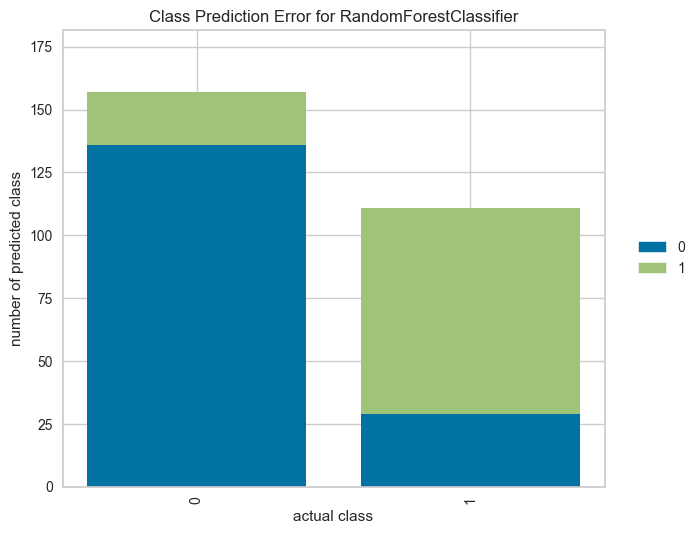

In [ ]:
#Grafico erros
plot_model(tunned_model, plot='error')

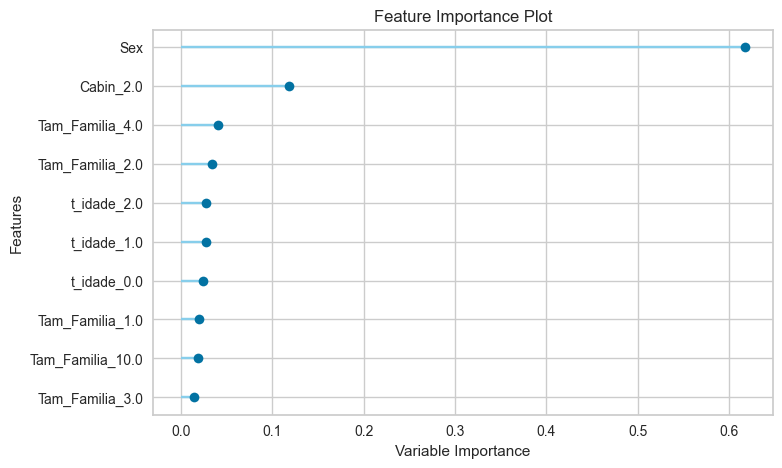

In [ ]:
plot_model(tunned_model, plot='feature')

In [ ]:
#Testando com dados de treinameto
p = predict_model(tunned_model)
p

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8134,0.8255,0.7961,0.7387,0.7664,0.6114,0.6126


,Sex,t_idade,Tam_Familia,Cabin,Survived,prediction_label,prediction_score
178,1,0,0,2,0,0,0.7953
457,0,0,1,3,1,1,1.0000
16,1,1,5,2,0,0,1.0000
95,1,0,0,2,0,0,0.7953
120,1,0,2,2,0,0,0.9136
...,...,...,...,...,...,...,...
429,1,0,0,4,1,1,0.7627
615,0,0,3,2,1,1,1.0000
860,1,0,2,2,0,0,0.9136
660,1,2,2,2,1,0,1.0000


In [ ]:
from sklearn import metrics as M

#Finalizar o modelo
final_model = finalize_model(tunned_model)
Survived_Predict = [1 if  i > 0.6 else 0 for i in p['prediction_label']]
print(M.accuracy_score(p['Survived'], Survived_Predict))

0.8134328358208955


In [ ]:
#Previsao
prev = predict_model(final_model, data=test)
prev

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Tam_Familia,Saudacao,t_idade,prediction_label,prediction_score
0,892,3,"Kelly, Mr. James",1,34.500000,0,0,330911,7.829200,2,1,0,2,0,0,0.7988
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.000000,1,0,363272,7.000000,2,2,1,3,0,1,0.8052
2,894,2,"Myles, Mr. Thomas Francis",1,62.000000,0,0,240276,9.687500,2,1,0,2,2,0,0.9033
3,895,3,"Wirz, Mr. Albert",1,27.000000,0,0,315154,8.662500,2,2,0,2,0,0,0.7988
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.000000,1,1,3101298,12.287500,2,2,2,3,0,1,0.8052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,32.252151,0,0,A.5. 3236,8.050000,2,2,0,2,0,0,0.7988
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.000000,0,0,PC 17758,108.900002,2,0,0,1,0,1,0.8052
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.500000,0,0,SOTON/O.Q. 3101262,7.250000,2,2,0,2,0,0,0.7988
416,1308,3,"Ware, Mr. Frederick",1,32.252151,0,0,359309,8.050000,2,2,0,2,0,0,0.7988


In [ ]:
Survived_Predict = [1 if  i > 0.6 else 0 for i in prev['prediction_label']]
df_pred = test.loc[:,['PassengerId']]
df_pred['Survived'] = Survived_Predict
df_pred.to_csv('predict_PYCARET.csv', index=False) 
df_pred

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
